## Finite Difference Method for Schroedinger Equation
### Harmonic Oscillator

Calculate wavefunctions and energies for given potential $u(x)$.

Use finite-difference method to turn this into an eigenvalue problem.
See ~/research/notes/finiteDifference/finiteDifference_notes.pdf, 
along with Mathematica notebooks that do similar calculations.

Schr&ouml;dinger equation:

$$
-\frac{d^2\psi}{dx^2} - \frac{2m}{\hbar^2}\, \frac{1}{2}kx^2\psi 
    = \frac{2m}{\hbar^2} E\psi
$$

Define a dimensionless length parameter

$$
x^\prime \equiv \frac{x}{a},
$$

where $a$ will be determined shortly.  Rewriting the Schr&ouml;dinger
equation gives

$$
-\frac{d^2\psi}{d{x^\prime}^2} + \left(\frac{kma^4}{\hbar^2}\right)
 \, {x^\prime}^2\psi 
    = \frac{2ma^2}{\hbar^2} E\psi
$$
Now choose $a$ so that the factor in parentheses is unity:
$$
a^4 = \frac{\hbar^2}{km} = \frac{\hbar^2}{m^2\omega^2}
\quad\longrightarrow \quad a^2 = \frac{\hbar}{m\omega}.
$$

The Schr&ouml;dinger equation can now be written as

$$
-\frac{d^2\psi}{d{x^\prime}^2} + {x^\prime}^2 \psi
    = \frac{E}{\hbar\omega} \psi
$$

which sugggests working with a dimensionless energy

$$ 
E^\prime \equiv \frac{2E}{\hbar\omega}
$$

giving a dimensionless version of the Schr&ouml;dinger equation

$$
-\frac{d^2\psi}{d{x^\prime}^2} + {x^\prime}^2 \psi
    = E^\prime \psi.
$$

This is good for computational work because there are no messy 
physical constants to worry about.

I use a finite-difference method to turn the solving of Schr&ouml;dinger's into an eigenvalue problem.  Briefly, after discretizing $x^\prime$, (i.e., $^\prime_j =  
x_0 + j\Delta$), an approximate version of Schr&ouml;dinger's equation can be written as 

$$
\frac{-\psi_{j+1} + 2\psi_j - \psi_{j-1}}{\Delta^2} +   x_j^2\psi_j =  
    E^\prime \psi_j.
$$

This is an eigenvalue problem:

$$  
H_{ji}\psi_i = E^\prime \psi_j,
$$

where 

$$
H_{ji} = \left\{\begin{array}{cl}
                \frac{2}{\Delta^2}  + x_i^2 & \mbox{for $i=j$} \\
                -\frac{1}{\Delta^2}  & \mbox{for  $i = j\pm 1$}\\
                0 & \mbox{otherwise}
                \end{array}\right.
$$
Used as supplementary exercise in PHYS 212E, Spring 2016

Marty Ligare

In [1]:
import numpy as np
from scipy import linalg

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def u(x):       # Potential energy function
    return x**2

In [4]:
n = 4000        # Number of intervals (J=1 in my notes)
dim = n - 1     # Number of internal points
xl = -20.       # xl is set far enough to left of well such that \psi=0
xr = 20.        # xr is set far enough to right of well such that \psi=0
                # For HO, results should be good up to energies of 
                # about (xr/2)**2 in units of \hbar/\omega

delta = (xr-xl)/n
        
x = np.linspace(xl+delta,xr-delta,dim)

#Fill Hamiltonian

h = np.zeros((dim,dim),float)
for i in range(len(h)-1):
        h[i,i+1] = h[i+1,i] = -1/delta**2 

for i in range(len(h)):
        h[i,i] = 2./delta**2 + u(x[i]) 

# Calculate eigenvalues and eigenvectors
vals, vecs = linalg.eigh(h)      #Note: eigenvectors are in columns of vecs

<IPython.core.display.Javascript object>


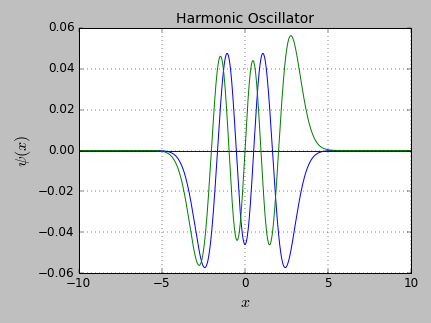

8.999743742618008
10.999618736679897


In [5]:
plt.figure()
plt.title("Harmonic Oscillator")
plt.xlabel("$x$")
plt.ylabel("$\psi(x)$")
plt.axhline(0)     #draw x axis
plt.grid()
plt.xlim(-10, 10)
for m in range(4,6):
    #y = np.transpose(vecs)[m]
    y = vecs.T[m]
    plt.plot(x,y)
    print(vals[m])

#### Energies

$$
E^\prime_4 = 9\quad\longrightarrow \quad E_4 = 4.5\hbar\omega
$$

$$
E^\prime_5 = 11\quad\longrightarrow \quad E_5 = 5.5\hbar\omega
$$

#### Version information

+ `%version_information` is an IPython magic extension for showing version 
information for dependency modules in a notebook;

+ See https://github.com/jrjohansson/version_information

+ `%version_information` is available on Bucknell computers on the linux network. 
You can easily install it on any computer.

In [6]:
%load_ext version_information

In [7]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
Fri Jan 01 11:53:27 2021 EST